**Loading and visualizing audio signals**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving FireIgnite.wav to FireIgnite.wav


In [ ]:
import librosa
import io    
audio_data = 'FireIgnite.wav' 
#audio_data = 'Ensoniq-ZR-76-01-Dope-77.wav'    #3seconds                                                
#audio_data = 'FireIgnite.wav'                   # path of the audio file

x,sr = librosa.load(audio_data)  # Returns an audio time series as a numpy array with a default sampling rate(sr) of 22KHZ

In [ ]:
!pip install IPython

In [ ]:
import IPython.display
IPython.display.Audio(audio_data)       # To play the audio file in a Jupyter Notebook using IPython.display.Audio

In [ ]:
print(type(x))

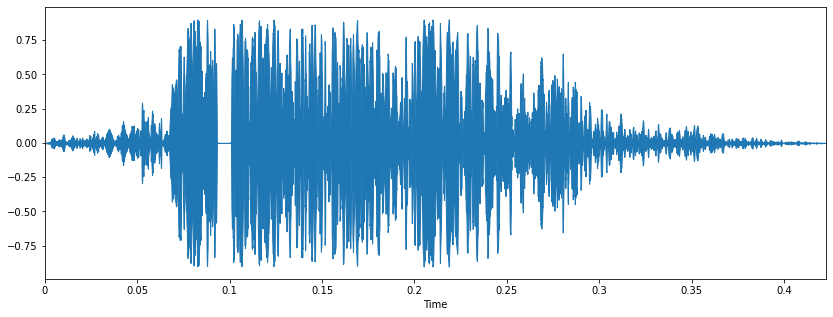

In [ ]:
#######  Waveform visualization   ################# 
%matplotlib inline
import matplotlib.pyplot as plt                  
import librosa.display

plt.figure(figsize=(14, 5))                      #  Waveform visualization of the amplitude vs the time representation of the signal
librosa.display.waveplot(x, sr=sr)               # Plotting the sampled signal

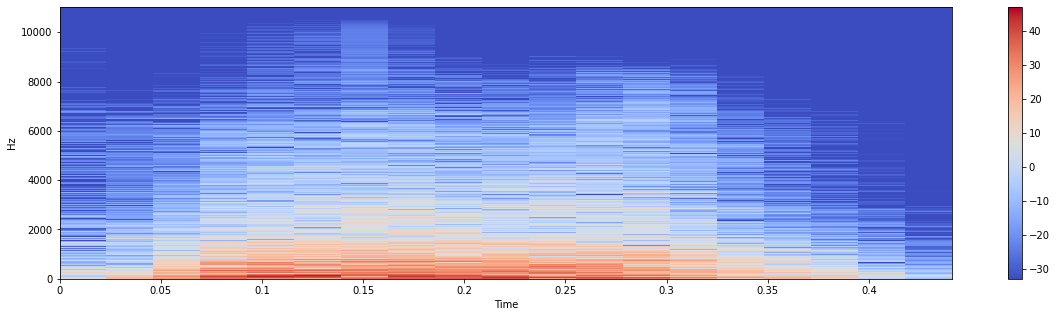

In [ ]:
#######  Spectrogram   ################# 
X = librosa.stft(x)   # x:numpy array,.stft() converts data into short term Fourier transfor so that we can know amplitude of given frequency at given time
Xdb = librosa.amplitude_to_db(abs(X))            # converting into energy levels(dB)

plt.figure(figsize=(20, 5))                      # spectrum of frequencies of a signal as it varies with time to see how energy levels (dB) vary over time.
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz') # .specshow is used to display a spectrogram.
plt.colorbar()                                   # time-frequency portraits of signals

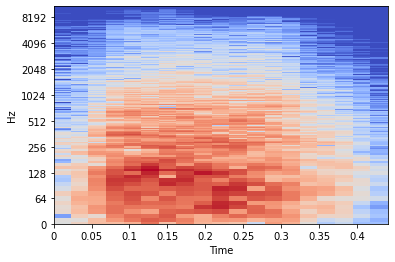

In [ ]:
#######  Log-frequency spectrum   ################# 
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')  # obtaining features from spectrogram by converting linear frequency axis into log axis
#  when we see that all action is taking place at the bottom of the spectrum, we can convert the frequency axis to a logarithmic one.

In [ ]:
#x = librosa.load(audio_data, sr=44000)           # Change this behavior by resampling at sr=44.1KHz

#x, sr = librosa.load('audio/simple_loop.wav')
#print(x.shape)                                   # Display the length of the audio array and sample rate
#print(sr)

#y, sr = librosa.load(audio_path)
#y_percussive = librosa.effects.hpss(y)
#tempo, beats = librosa.beat.beat_track(y=y_percussive, sr=sr) 
#librosa.frames_to_time(beats)                    # the beats will be in frames. You can convert them to actual time using

**Creating an audio signal and saving it**

A digitized audio signal is a NumPy array with a specified frequency and sample rate. The analog wave format of the audio signal represents a function (i.e. sine, cosine etc). We need to save the composed audio signal generated from the NumPy array. This kind of audio creation could be used in applications that require voice-to-text translation in audio-enabled bots or search engines.

In [ ]:
import numpy as np
sr = 22050                                       # sample rate
T = 5.0                                          # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)                    # pure sine wave at 220 Hz

In [ ]:
import IPython.display as ipd                    # playing generated audio
ipd.Audio(x, rate=sr)                            # load a NumPy array

In [ ]:
librosa.output.write_wav('generated.wav', x, sr) # writing wave file in .wav format

**Techniques of pre-processing of audio data by pre-emphasis, normalization**

The number of data points in digital audio is much higher. This may lead to memory issues. Data pre-processing steps can be difficult and memory-consuming, as we’ll often have to deal with audio signals that are longer than 1 second. 

In [ ]:
######## Normalization ########
# A technique used to adjust the volume of audio files to a standard set level; if this isn’t done, the volume can differ greatly from word to word, 
# and the file can end up unable to be processed clearly.

# min = minimum value for each row of the vector signal
# max = maximum value for each row of the vector signal
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

librosa.display.waveplot(x, sr=sr, alpha=0.4)    # Plotting the Spectral Centroid along the waveform
plt.plot(t, normalize(spectral_centroids), color='r')

######## Pre-emphasis ########
# Done before starting with feature extraction to compensate the high-frequency section, which is suppressed naturally when humans make sounds.
# Done by boosting only the signal’s high-frequency components, while leaving the low-frequency components in their original states. 

import matplotlib.pyplot as plt
y, sr = librosa.load(audio_file.wav, offset=30, duration=10)
y_filt = librosa.effects.preemphasis(y)

S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)           # Plot the results for comparison
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(y_filt)), ref=np.max)

librosa.display.specshow(S_orig, y_axis='log', x_axis='time')
plt.title('Original signal')
librosa.display.specshow(S_preemph, y_axis='log', x_axis='time')
plt.title('Pre-emphasized signal')

**Feature extraction from audio files by Zero Crossing Rate, MFCC, and Chroma frequencies**

The spectral features (frequency-based features), which are obtained by converting the time-based signal into the frequency domain using the Fourier Transform, like fundamental frequency, frequency components, spectral centroid, spectral flux, spectral density, spectral roll-off, etc.

In [ ]:
######## Zero Crossing Rate ########
# The number times over a given interval that the signal’s amplitude crosses a value of zero. 
# Essentiually, it denotes the number of times the signal changes sign from positive to negative in the given time period. 
# If the count of zero crossings is higher for a given signal, the signal is said to change rapidly i.e. contains high-frequency information & vice-versa.

n0 = 9000                                                                # zero crossings to be found between a given time
n1 = 9100
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()

zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
zero_crossings.shape

######## Spectral Rolloff #############
# The rolloff frequency is defined as the frequency under which the cutoff of the total energy of the spectrum is contained, eg. 85%. 
# It can be used to distinguish between harmonic and noisy sounds.

y, sr = librosa.load(librosa.util.example_audio_file())
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)                    # Approximate maximum frequencies with roll_percent=0.85 (default)

rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr, roll_percent=0.1)  # Approximate minimum frequencies with roll_percent=0.1

####### MFCC (Mel-frequency cepstral coefficients) ################
# It has 39 features. The feature count is small enough to force the model to learn the information of the audio. 
# 12 parameters are related to the amplitude of frequencies.

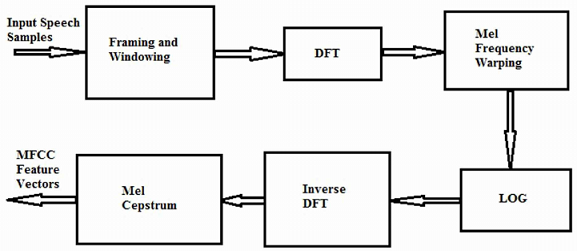



1.   Framing and Windowing: The continuous speech signal is blocked into frames of N samples, with adjacent frames being separated by M. The result after this step is called spectrum.
2.   Mel Frequency Wrapping: For each tone with a frequency f, a pitch is measured on the Mel scale. This scale uses a linear spacing for frequencies below 1000Hz and transforms frequencies above 1000Hz by using a logarithmic function.
3. Cepstrum: Converting of log-mel scale back to time. This provides a good representation of a signal’s local spectral properties, with the result as MFCC features.

In [ ]:
librosa.feature.mfcc(x, sr=sr)          # x = time domain NumPy series and sr = sampling rate


####### Chroma Frequencies ###############
# The entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave (1 octave=12 pitches). 
# The human perception of pitch is periodic in the sense that two pitches are perceived as similar if they differ by one or several octaves.

x, sr = librosa.load('audio.wav')
ipd.Audio(x, rate=sr)

hop_length = 512
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)  # returns normalized energy for each chroma bin at each frame.
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')


Fun Time: Linkin Park Vs Micheal Jackson Vs Blue
Lets compare the Spectrograms for three very popular songs:

Use librosa.beat.beat_track to estimate the beat locations and the global tempo:

In [ ]:
tempo, beat_times = librosa.beat.beat_track(x, sr=sr, start_bpm=60, units='time')
print(tempo)
print(beat_times)

Plot the beat locations over the waveform:

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, alpha=0.6)
plt.vlines(beat_times, -1, 1, color='r')
plt.ylim(-1, 1)

Plot a histogram of the intervals between adjacent beats:

In [ ]:
beat_times_diff = numpy.diff(beat_times)
plt.figure(figsize=(14, 5))
plt.hist(beat_times_diff, bins=50, range=(0,4))
plt.xlabel('Beat Length (seconds)')
plt.ylabel('Count')

Visually, it's difficult to tell how correct the estimated beats are. Let's listen to a click track:

In [ ]:
clicks = librosa.clicks(beat_times, sr=sr, length=len(x))
ipd.Audio(x + clicks, rate=sr)

Use the IPython interactive widgets to observe how the output changes as we vary the parameters of the beat tracker.

def f(start_bpm, tightness_exp):
    return librosa.beat.beat_track(x, sr=sr, start_bpm=start_bpm, tightness=10**tightness_exp, units='time')
interact(f, start_bpm=60, tightness_exp=2)

Novelty Functions
To detect note onsets, we want to locate sudden changes in the audio signal that mark the beginning of transient regions. Often, an increase in the signal's amplitude envelope will denote an onset candidate. However, that is not always the case, for notes can change from one pitch to another without changing amplitude, e.g. a violin playing slurred notes.

Novelty functions are functions which denote local changes in signal properties such as energy or spectral content. We will look at two novelty functions:

Energy-based novelty functions (FMP, p. 306)
Spectral-based novelty functions (FMP, p. 309)

Energy-based Novelty Functions
Playing a note often coincides with a sudden increase in signal energy. To detect this sudden increase, we will compute an energy novelty function (FMP, p. 307):

Compute the short-time energy in the signal.
Compute the first-order difference in the energy.
Half-wave rectify the first-order difference.

librosa.feature.rmse returns the root-mean-square (RMS) energy for each frame of audio. We will compute the RMS energy as well as its first-order difference.

In [ ]:
hop_length = 512
frame_length = 1024
rmse = librosa.feature.rmse(x, frame_length=frame_length, hop_length=hop_length).flatten()
rmse_diff = numpy.zeros_like(rmse)
rmse_diff[1:] = numpy.diff(rmse)

print(rmse.shape)
print(rmse_diff.shape)

To obtain an energy novelty function, we perform half-wave rectification (FMP, p. 307) on rmse_diff, i.e. any negative values are set to zero. Equivalently, we can apply the function $\max(0, x)$:

In [ ]:
energy_novelty = numpy.max([numpy.zeros_like(rmse_diff), rmse_diff], axis=0)

Plot all three functions together:

In [ ]:
frames = numpy.arange(len(rmse))
t = librosa.frames_to_time(frames, sr=sr)

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(t, rmse, 'b--', t, rmse_diff, 'g--^', t, energy_novelty, 'r-')
plt.xlim(0, t.max())
plt.xlabel('Time (sec)')
plt.legend(('RMSE', 'delta RMSE', 'energy novelty'))